# Assignment 3 Data Analysis, Shaping and Visualization

#### **Developer:** Mark Trombly
#### **Course:** Artifical Intelligence Applications
#### **Program Requirements**
~~~
1. Get
2. Clean
3. Prepare
4. Analyze
5. Display/Visualize
~~~
#### **Note:** In each of the following examples, research the functions/properties/options indicated.

In [1]:
# 1. import necessary modules
import sys
import os
import pandas as pd
print(sys.version) # print python version
print(os.environ['CONDA_DEFAULT_ENV']) # print conda environment

3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
testenv


## Get data - read cleaned pickle file

In [2]:
# 2. read cleaned pickle file from Assignment 2 into "mortality_data" variable
mortality_data = pd.read_pickle('mortality_cleaned.pkl')

## Examine cleaned data

In [3]:
# 3. display first and last 5 rows with one command!
# Note: the following way *only* works in Jupyter Notebooks
# mortality_data
print(mortality_data)

     Year     AgeGroup  DeathRate
0    1900    1-4 Years     1983.8
1    1901    1-4 Years     1695.0
2    1902    1-4 Years     1655.7
3    1903    1-4 Years     1542.1
4    1904    1-4 Years     1591.5
..    ...          ...        ...
471  2014  15-19 Years       45.5
472  2015  15-19 Years       48.3
473  2016  15-19 Years       51.2
474  2017  15-19 Years       51.5
475  2018  15-19 Years       49.2

[476 rows x 3 columns]


## Display DataFrame attributes

In [4]:
# 4. Use Pandas DataFrame info() Method:
# Prints:
# 1. number of columns
# 2. column labels
# 3. column data types
# 4. memory usage
# 5. range index
# 6. number of cells in each column (non-null values).
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [5]:
# 5. print the following DataFrame attributes: index, columns, size, and shape
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')
Size:    1428
Shape:   (476, 3)


## Prepare data

### Sort data

In [6]:
# 6. display first 3 records sorted by DeathRate in ascending order
# Note: sort_values() function sorts in ascending order by default!
print(mortality_data.sort_values('DeathRate').head(3))

     Year   AgeGroup  DeathRate
231  2012  5-9 Years       11.4
233  2014  5-9 Years       11.5
237  2018  5-9 Years       11.5


In [7]:
# 7. display first 3 records sorted by DeathRate in descending order
print(mortality_data.sort_values('DeathRate', ascending=False).head(3))

   Year   AgeGroup  DeathRate
0  1900  1-4 Years     1983.8
1  1901  1-4 Years     1695.0
2  1902  1-4 Years     1655.7


In [8]:
# 8. display first 3 records sorted by Year and DeathRate, *both* in ascending order
# Note: major/minor order (left to right). Here, first Year, then DeathRate.
print(mortality_data.sort_values(['Year','DeathRate']).head(3))

     Year     AgeGroup  DeathRate
238  1900  10-14 Years      298.3
119  1900    5-9 Years      466.1
357  1900  15-19 Years      484.8


In [9]:
# 9. display first 3 records sorted by DeathRate and Year, *both* in ascending order
# Note: difference in major/minor sort order
print(mortality_data.sort_values(['DeathRate', 'Year']).head(3))

     Year   AgeGroup  DeathRate
231  2012  5-9 Years       11.4
229  2010  5-9 Years       11.5
233  2014  5-9 Years       11.5


In [10]:
# 10. display first 5 records sorted (first) by Year (ascending), then DeathRate (descending)
print(mortality_data.sort_values(['Year','DeathRate'],
                                  ascending=[True,False]).head())

     Year     AgeGroup  DeathRate
0    1900    1-4 Years     1983.8
357  1900  15-19 Years      484.8
119  1900    5-9 Years      466.1
238  1900  10-14 Years      298.3
1    1901    1-4 Years     1695.0


In [11]:
# 11. display first 5 records sorted (first) by DeathRate (descending),  then Year (ascending)
print(mortality_data.sort_values(['DeathRate','Year'],
                                 ascending=[False,True]).head())

   Year   AgeGroup  DeathRate
0  1900  1-4 Years     1983.8
1  1901  1-4 Years     1695.0
2  1902  1-4 Years     1655.7
4  1904  1-4 Years     1591.5
6  1906  1-4 Years     1580.0


## Preparing data - apply statistical functions

In [12]:
# 12. display DeathRate mean
print(mortality_data.DeathRate.mean())

192.92415966386554


In [13]:
# 13. display concatenated string and numeric output
print("DeathRate mean: " + str(mortality_data.DeathRate.mean()))
# or...
# print("DeathRate mean: ", str(mortality_data.DeathRate.mean()))

DeathRate mean: 192.92415966386554


In [14]:
# 14. Same as above, though formatted to two decimal places
print("DeathRate mean: "
      + str(format(mortality_data.DeathRate.mean(), ".2f")))

DeathRate mean: 192.92


In [15]:
# 15. display max AgeGroup and DeathRate values (two columns)
# Note: AgeGroup sorted by *ASCII* values (5>1)--that is, why it is important to zero-fill, when necessary (see below)!
print(mortality_data[['AgeGroup','DeathRate']].max())

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object


In [16]:
# 16. display total numbers (all columns, excluding null values):
print(mortality_data.count())

Year         476
AgeGroup     476
DeathRate    476
dtype: int64


In [17]:
# 17. using pandas quantile() function, display 50% value of Year column, verify using median() function
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
print(mortality_data[['Year']].quantile([.5]))
print(mortality_data[['Year']].median())

       Year
0.5  1959.0
Year    1959.0
dtype: float64


In [18]:
# 18. sames as above, though, display 50% value of *both* Year *and* DeathRate columns, verify using median() function
print(mortality_data[['Year','DeathRate']].quantile([.5]))
print(mortality_data[['Year','DeathRate']].median())

       Year  DeathRate
0.5  1959.0       89.5
Year         1959.0
DeathRate      89.5
dtype: float64


In [19]:
# 19. Same as above, though, display 10% value of *both* Year *and* DeathRate columns, then 90% value of each, using *one* statement
# quantile values (Example: 10% and 90%)
# 10% year = 1911.5, and 10% of death rates less than 21.50.
# 90% year = 2006.5, and 90% of death rates less than 430.85.
print(mortality_data.quantile([.1,.9], numeric_only=True))

# Note: The default value of numeric_only in DataFrame.quantile is deprecated.
# In a future version, it will default to False.
# Select only valid columns or specify the value of numeric_only to silence this warning.

       Year  DeathRate
0.1  1911.5      21.50
0.9  2006.5     430.85


In [20]:
# 20. display cumative sum of DeathRate values (i.e., each row added to previous row), use cumsum() function
print(mortality_data['DeathRate'].cumsum())

0       1983.8
1       3678.8
2       5334.5
3       6876.6
4       8468.1
        ...   
471    91631.7
472    91680.0
473    91731.2
474    91782.7
475    91831.9
Name: DeathRate, Length: 476, dtype: float64


In [21]:
# 21. verify cumsum() function by displaying first 5 records of DeathRate col
print(mortality_data['DeathRate'].head(5))

0    1983.8
1    1695.0
2    1655.7
3    1542.1
4    1591.5
Name: DeathRate, dtype: float64


## Preparing data - column arithmetic

In [22]:
# 22. create and display two new columns (i.e., 'Mean' and 'MeanCentered') in DataFrame using column arithmetic
# 'Mean Centered' displays how far from the mean each value is, a constant is subrracted (the mean) from every value of a particular variable--here DeathRate.
# 'centering' refers to the process of subracting the mean from a variable (usually a predictor)
# 'centering' is important when interpreting group effects of interest
# 'centering' redefines '0 point' for 'predictor' to be whatever value was subtracted (here, the mean). It shifts the scal over, but retains the units.
# Note: Explicit line joining using backslash (\).
# https://docs.python.org/3/reference/lexical_analysis.html#line-structure
mortality_data['Mean'] = mortality_data.DeathRate.mean()
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [23]:
# 23. print mortality_data DF
# Note: new cols in mortality_data DataFrame
print(mortality_data)

     Year     AgeGroup  DeathRate       Mean  MeanCentered
0    1900    1-4 Years     1983.8  192.92416    1790.87584
1    1901    1-4 Years     1695.0  192.92416    1502.07584
2    1902    1-4 Years     1655.7  192.92416    1462.77584
3    1903    1-4 Years     1542.1  192.92416    1349.17584
4    1904    1-4 Years     1591.5  192.92416    1398.57584
..    ...          ...        ...        ...           ...
471  2014  15-19 Years       45.5  192.92416    -147.42416
472  2015  15-19 Years       48.3  192.92416    -144.62416
473  2016  15-19 Years       51.2  192.92416    -141.72416
474  2017  15-19 Years       51.5  192.92416    -141.42416
475  2018  15-19 Years       49.2  192.92416    -143.72416

[476 rows x 5 columns]


## Preparing data - modify sting data in column

In [24]:
# 24. modify col names, so that col names are treated 'equally,' that is, when being sorted (here, using dictionary)
# replace col names in DataFrame
mortality_data.AgeGroup = mortality_data.AgeGroup.replace({'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'})

# print(mortality_data.head(120)) # display only to verify

## Save prepped DataFrame to pickle file, then read

In [25]:
# 25. save prepped DataFrame to pickle file
mortality_data.to_pickle('mortality_prepped.pkl')

In [26]:
# 26. Read prepped DataFrame from pickle file, and print first 5 records
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,Mean,MeanCentered
0,1900,01-04 Years,1983.8,192.92416,1790.87584
1,1901,01-04 Years,1695.0,192.92416,1502.07584
2,1902,01-04 Years,1655.7,192.92416,1462.77584
3,1903,01-04 Years,1542.1,192.92416,1349.17584
4,1904,01-04 Years,1591.5,192.92416,1398.57584


## Shape data - using index (sometimes, makes plotting easier!)

### Set and use an index

In [27]:
# 27. display first 2 records (note current indexes)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,Mean,MeanCentered
0,1900,01-04 Years,1983.8,192.92416,1790.87584
1,1901,01-04 Years,1695.0,192.92416,1502.07584


In [28]:
# 28. index "year" col, then display first two records (note new indexes)
# ***Note:*** indexed columns *cannot* be used as parameters in other methods/functions!
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,Mean,MeanCentered
Year,,,,
1900,01-04 Years,1983.8,192.92416,1790.87584
1901,01-04 Years,1695.0,192.92416,1502.07584


In [29]:
# 29. reset original index, then display first two records (note original indexes)
# replace set to true to in order to replace values in DataFrame
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,Mean,MeanCentered
0,1900,01-04 Years,1983.8,192.92416,1790.87584
1,1901,01-04 Years,1695.0,192.92416,1502.07584


In [30]:
# 30. create multi-index, check validity (i.e., no duplicates), then display first two records (note new indexes)
# set multi-index to 'Year' and 'AgeGroup'
mortality_data = mortality_data.set_index(
    ['Year', 'AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,Mean,MeanCentered
Year,AgeGroup,,,
1900,01-04 Years,1983.8,192.92416,1790.87584
1901,01-04 Years,1695.0,192.92416,1502.07584


In [31]:
# 31. reset original index (using inplace), then display first two records (not new indexes)
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,Mean,MeanCentered
0,1900,01-04 Years,1983.8,192.92416,1790.87584
1,1901,01-04 Years,1695.0,192.92416,1502.07584


## Shape data - using pivot (wide data)

* Similar to spreadsheet
* Each observation defined by both
    1. value at cell in table, and
    1. coordinates of cell with respect to row and column indices.
* Note: **Cannot** access variables in dataset by name
* https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data

## Pandas pivot() function:

### https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot

### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

#### **Parameters:**


* *index:* Column to use to make new DataFrame's index. If None, uses existing index.
* *columns:* Column to use to make new DataFrame's columns.
* *values:* Columns(s) to use for populating new DataFrame's values. If not specified, all remaining columns used
* Returns: Reshaped DataFrame
* Exeption: ValueError raised if there are any duplicate indexes (cannot reshape if index/column pair not unique!)

In [32]:
# 32. pivot the following DataFrame: index='Year', columns='AgeGroup'
# index: 'Year'
# column to use to make new frame's columns: 'AgeGroup'
# values: all remaining columns to populate new DataFrame's values
# Noe: if no 'values' par, uses *all* remaining cols!
# assign resulting DataFrame to 'morality_wide' variable, then display first 3 records
mortality_wide = mortality_data.pivot(index='Year',columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                            Mean  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years 01-04 Years   
Year                                                                   
1900          1983.8       466.1       298.3       484.8   192.92416   
1901          1695.0       427.6       273.6       454.4   192.92416   
1902          1655.7       403.3       252.5       421.5   192.92416   

                                             MeanCentered              \
AgeGroup 05-09 Years 10-14 Years 15-19 Years  01-04 Years 05-09 Years   
Year                                                                    
1900       192.92416   192.92416   192.92416   1790.87584   273.17584   
1901       192.92416   192.92416   192.92416   1502.07584   234.67584   
1902       192.92416   192.92416   192.92416   1462.77584   210.37584   

                                  
AgeGroup 10-14 Years 15-19 Years  
Year                              
1900       105.37584   291.87584  
1901        80.67584   261.47584  
1902        59.57584   228.57584

In [33]:
# 33. pivot the following DataFrame:
# index: 'Year'
# column to use to make new frame's columns: 'AgeGroup'
# values: 'DeathRate'
# assign resulting DataFrame to 'mortality_wide' variable, then display fist 3 records
mortality_wide = mortality_data.pivot(index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5


In [34]:
# 34. save wide DataFrame to Excel file ('mortality_wide.xlsx')
# Note: *Be careful* saving wide DataFrame to Excel file changes index--must change back (see below)!
mortality_wide.to_excel('mortality_wide.xlsx')

In [35]:
# 35. read saved Excel file and assign to 'mortality_wide' variable, then display first 4 records
mortality_wide = pd.read_excel('mortality_wide.xlsx')
print(mortality_wide.head(4))

   Year  01-04 Years  05-09 Years  10-14 Years  15-19 Years
0  1900       1983.8        466.1        298.3        484.8
1  1901       1695.0        427.6        273.6        454.4
2  1902       1655.7        403.3        252.5        421.5
3  1903       1542.1        414.7        268.2        434.1


In [36]:
# 36. save wide DataFrame to pickle file ('mortality_wide.pkl')
mortality_wide.to_pickle('mortality_wide.pkl')

In [37]:
# 37. read saved pickle file and assign to 'mortality_wide' variable, then display first 5 records
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,1983.8,466.1,298.3,484.8
1,1901,1695.0,427.6,273.6,454.4
2,1902,1655.7,403.3,252.5,421.5
3,1903,1542.1,414.7,268.2,434.1
4,1904,1591.5,425.0,305.2,471.4


## Shape data - using melt (long data)

* Each variable is a column
* Each observatoin is a row
* can access variables in dataset by name
* https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data

## Pandas melt() function:

### https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt

### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html

#### **Parameters:**


* *id_vars:* Column(s) to use as identifier variables.
* *value_vars:* Column(s) to unpivot. If not specified, uses all columns not set as id_vars.
* *var_name:* Name to use for 'variable' column. If none, uses frame.columns.name or 'variable'.
* *value_name:* Name to use for 'value' column.
* *col_level:* If columns MultiIndex, then use this level to melt.
* *ignore_index:* If True, original index ignored. If False, original index retained. Index labels will be repeated as necessary.
* Returns: Reshaped DataFrame

In [38]:
# 38. melt following DataFrame: 'mortality_wide'
# id_vars='Year'
# value_vars=['01-04 Years', '05-09 Years']
# var_name='AgeGroup'
# value_name='DeathRate'
# assign resulting DataFrame to 'mortality_long' variable, then display first 4 records

mortality_long = mortality_wide.melt(
    id_vars='Year',
    value_vars=['01-04 Years', '05-09 Years'],
    var_name='AgeGroup',
    value_name='DeathRate')
mortality_long.head(4)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1


In [39]:
# 39. using pandas option_context() function, display 6 rows (first 3 and last 3) and all cols
# Note: option_context() - executes codeblock with set of options that revert to prior settings after execution
# Note: 'None' value for 'display.max_columns' property returns *all* cols.
with pd.option_context(
    'display.max_rows', 6,
        'display.max_columns', None):
    print(mortality_long)

     Year     AgeGroup  DeathRate
0    1900  01-04 Years     1983.8
1    1901  01-04 Years     1695.0
2    1902  01-04 Years     1655.7
..    ...          ...        ...
235  2016  05-09 Years       12.2
236  2017  05-09 Years       11.6
237  2018  05-09 Years       11.5

[238 rows x 3 columns]


## Analyze grouped data using (single aggregate) functions

In [40]:
# 40. display first 5 records of 'morality_data' DF (i.e., prior to aggregation)
mortality_data.head()

,Year,AgeGroup,DeathRate,Mean,MeanCentered
0,1900,01-04 Years,1983.8,192.92416,1790.87584
1,1901,01-04 Years,1695.0,192.92416,1502.07584
2,1902,01-04 Years,1655.7,192.92416,1462.77584
3,1903,01-04 Years,1542.1,192.92416,1349.17584
4,1904,01-04 Years,1591.5,192.92416,1398.57584


In [41]:
# 41. group 'AgeGroup' by mean, and display DF
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,Mean,MeanCentered
AgeGroup,,,,
01-04 Years,1959.0,383.226050,192.92416,190.301891
05-09 Years,1959.0,117.326050,192.92416,-75.598109
10-14 Years,1959.0,93.769748,192.92416,-99.154412
15-19 Years,1959.0,177.374790,192.92416,-15.549370


In [42]:
# 42. group 'Year' by median, and display first 4 records
# Note: See numeric_only=True note above.
mortality_data.groupby('Year').median(numeric_only=True).head(4)

,DeathRate,Mean,MeanCentered
Year,,,
1900,475.45,192.92416,282.52584
1901,441.00,192.92416,248.07584
1902,412.40,192.92416,219.47584
1903,424.40,192.92416,231.47584


In [43]:
# 43. group 'Year' and 'AgeGroup' by count, and display first 5 records
# Note: only for demo purposes, since there is only 1 record for each group
mortality_data.groupby(['Year', 'AgeGroup']).count().head()

DeathRate  Mean  MeanCentered
Year AgeGroup                                  
1900 01-04 Years          1     1             1
     05-09 Years          1     1             1
     10-14 Years          1     1             1
     15-19 Years          1     1             1
1901 01-04 Years          1     1             1

In [44]:
# 44. group 'AgeGroup', then return statistical summary for 'DeathRate' using 'describe()' fuction
mortality_data.groupby('AgeGroup')['DeathRate'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
01-04 Years,119.0,383.226050,500.454211,24.0,50.65,109.1,577.30,1983.8
05-09 Years,119.0,117.326050,127.474958,11.4,24.00,48.4,198.90,466.1
10-14 Years,119.0,93.769748,88.404363,13.9,27.20,44.6,158.90,375.1
15-19 Years,119.0,177.374790,138.362290,44.8,85.45,106.9,283.65,777.4


## Analyze grouped data using (multiple) aggregate functions

In [45]:
# 45. group 'AgeGroup', then using agg() function, aggregate *all* columns using 'mean' and 'median' functions
mortality_data.groupby('AgeGroup').agg(['mean', 'median'])

Year           DeathRate              Mean             \
               mean  median        mean median       mean     median   
AgeGroup                                                               
01-04 Years  1959.0  1959.0  383.226050  109.1  192.92416  192.92416   
05-09 Years  1959.0  1959.0  117.326050   48.4  192.92416  192.92416   
10-14 Years  1959.0  1959.0   93.769748   44.6  192.92416  192.92416   
15-19 Years  1959.0  1959.0  177.374790  106.9  192.92416  192.92416   

            MeanCentered             
                    mean     median  
AgeGroup                             
01-04 Years   190.301891  -83.82416  
05-09 Years   -75.598109 -144.52416  
10-14 Years   -99.154412 -148.32416  
15-19 Years   -15.549370  -86.02416

In [46]:
# 46. group 'AgeGroup', then using agg() function, aggregate only 'DeathRate' column
# using 'mean', 'median', 'standrd deviation', and 'unique' functions
mortality_data.groupby('AgeGroup')['DeathRate'].agg(['mean', 'median', 'std', 'nunique'])

,mean,median,std,nunique
AgeGroup,,,,
01-04 Years,383.226050,109.1,500.454211,117
05-09 Years,117.326050,48.4,127.474958,115
10-14 Years,93.769748,44.6,88.404363,115
15-19 Years,177.374790,106.9,138.362290,117


In [47]:
# 47. group 'Year', then using agg() function, aggregate only 'DeathRate' column
# using 'mean', 'median', 'standard deviation', 'min', 'max', 'variance', and 'unique' functions
mortality_data.groupby('Year')['DeathRate'].agg(['mean', 'median', 'std', 'min', 'max', 'var', 'nunique'])

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,808.250,475.45,788.173697,298.3,1983.8,621217.776667,4
1901,712.650,441.00,659.727972,273.6,1695.0,435240.996667,4
1902,683.250,412.40,652.709642,252.5,1655.7,426029.876667,4
1903,664.775,424.40,589.553319,268.2,1542.1,347573.115833,4
1904,698.275,448.20,599.586065,305.2,1591.5,359503.449167,4
...,...,...,...,...,...,...,...
2014,23.750,19.00,15.473095,11.5,45.5,239.416667,4
2015,24.875,19.75,16.612119,11.7,48.3,275.962500,4
2016,25.825,19.95,17.849440,12.2,51.2,318.602500,4


### Visualize data

#### **Note:** There is **no** "best" way to visualize data. Different questions are best answered by different visualizations!

#### **Chart Visualization.** https://pandas.pydata.org/docs/user_guide/visualization.html

#### **An Intuitive Guide to Data Visualization in Python:** https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/

<Axes: xlabel='Year'>

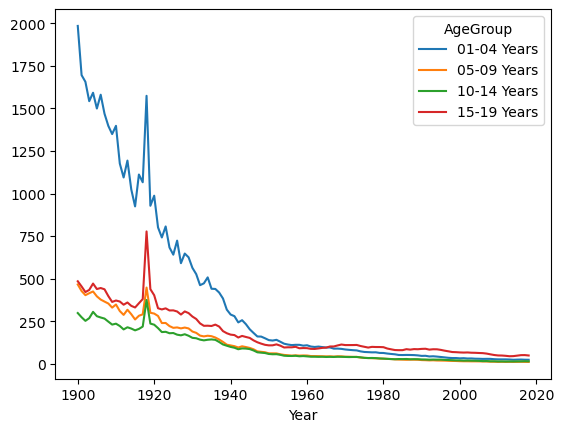

In [48]:
# 48. pivot 'mortality_data' DataFrame using the following parameters:
# index: 'Year'
# column to use to make new fame's columns: 'AgeGroup'
# values: all remaining columns to populate new DataFrame's values
# Note: if no 'values' par, uses *all* remaining cols!
# after pivoting DataFrame, use plot() function to display line plot (default)
mortality_data.pivot(index='Year', columns='AgeGroup')['DeathRate'].plot()

In [49]:
# 49. display same plot as above by re-indexing mortality_wide DF
# Note: Because, saving wide DataFrame to Excel file changes index--must re-index (see above)!
# Change index back to 'Year'
mortality_wide = mortality_wide.set_index('Year')

# save wide DataFrame to pickle file ('mortality_wide.pkl')
# read saved pickle file and assign to 'mortality_wide' variable,
# then display first 5 records to display new index
mortality_wide.to_pickle('mortality_wide.pkl')
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Outlilers

* Defined: "Unusual" dataset values
* Problematic: Distort findings
* Identifying outliers (simple):
  1. Sort data
  2. Graphs (e.g., boxplot (very easy to see!), scatterplot, and histogram)
* Fixing:
  <ol>
  <li>Keep (not always bad!)</li>
  <li>Drop</li>
  <li>Modify (Winsorizaing): https://en.wikipedia.org/wiki/Winsorizing
    <ol>
      <li>Cap (values)</li>
      <li>Reassign (e.g., to mean/median value, or linear interpolation - "curve fitting"/estimating new values)</li>
      <li>Other (nonexclusive) procedures--that is, not permitting "exclusive" procedures like trimming or truncating values</li>
    </ol>
  </li>
</ol>

<Axes: >

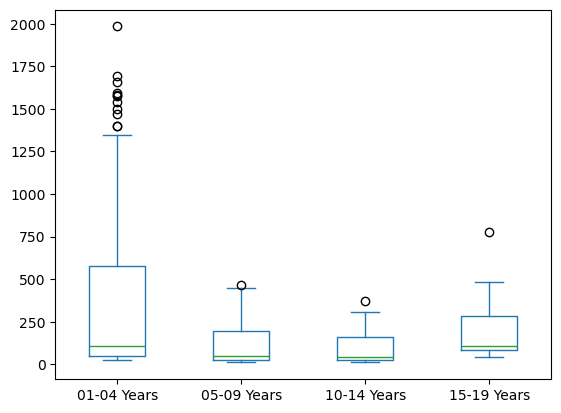

In [50]:
# https://www.simplypsychology.org/boxplots.html
# 50. using 'mortality_data' DataFrame, create a box plot (aka "box and whisker plot") for each age group
# Note: box plot displays five-number summary: min, 1st quartile, median (2nd quartile), 3rd quartile, and max.
# Note: interquartile range (IQR) is the "box"--that is, bet. 1st and 3rd quartile
# Note: outliers are *actual* min/max values (cata points located outside whiskers of box plot)
mortality_wide.plot.box()

<Axes: title={'center': 'Deathrate by AgeGroup'}, xlabel='Year', ylabel='Deaths per 100,000'>

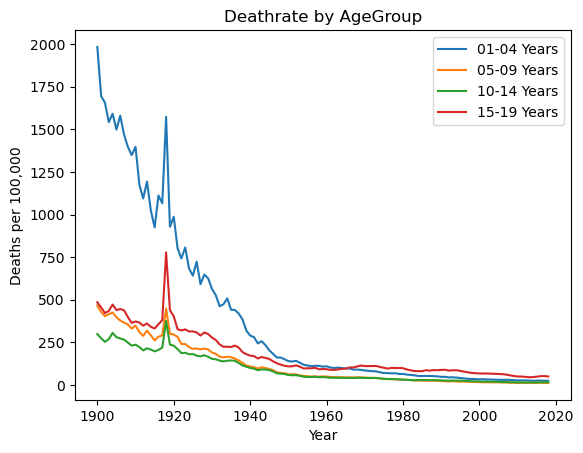

In [51]:
# 51. display line plot for re-indexed mortality_wide DF
# Note: xLabel: 'Year', ylabel: 'Deaths per 100,000', title: 'DeathRate by AgeGroup'
mortality_wide.plot(xlabel='Year', ylabel='Deaths per 100,000', title='Deathrate by AgeGroup')

<Axes: xlabel='AgeGroup'>

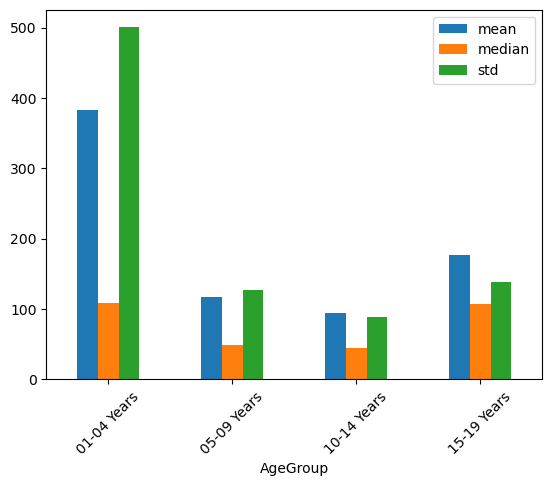

In [52]:
# 52. using 'mortality_data' DataFrame, group 'AgeGroup', then aggregate only 'DeathRate' column
# using 'mean', 'medium', 'standard deviation', aggregate functions, then, plot vertical bar plot (rotate x-axis labels 45 degrees)
mortality_data.groupby('AgeGroup')['DeathRate'].agg(['mean', 'median', 'std']).plot.bar(rot=45)

<Axes: ylabel='AgeGroup'>

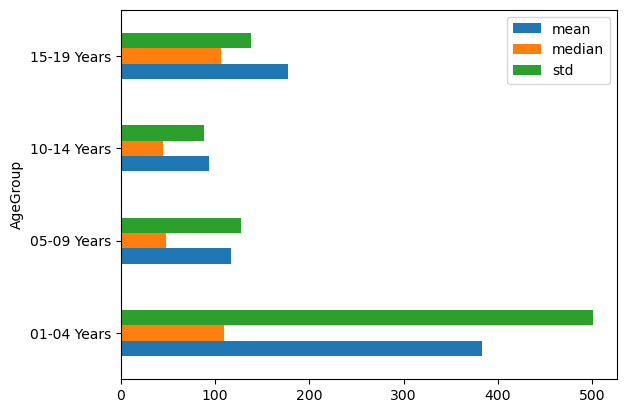

In [53]:
# 53. sames as above using horizontal bar plot
mortality_data.groupby('AgeGroup')['DeathRate'].agg(['mean', 'median', 'std']).plot.barh()

<Axes: ylabel='DeathRate'>

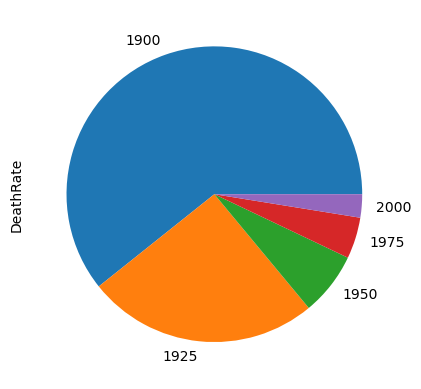

In [54]:
# 54. using 'mortality_data' DataFrame, query the following years: 1900, 1925, 1950, 1975, 2000, group by 'Year',
# then aggregate only 'DeathRate' column using sum() function, and, plot the following graph using pie plot
mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)').groupby('Year').DeathRate.sum().plot.pie()

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, ylabel='Year'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, ylabel='Year'>]],
      dtype=object)

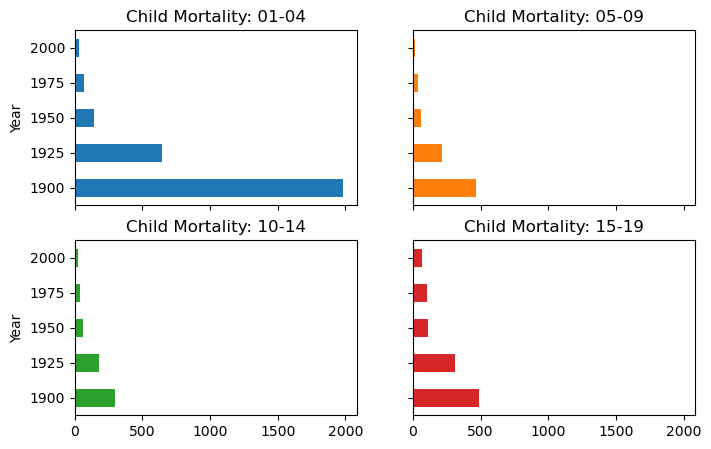

In [55]:
# 55. using 'mortality_wide' DataFrame, query the following years: 1900, 1925, 1950, 1975, 2000
# then, create subplots for each of the following age groups: 01-04, 05-09, 10-14, 15-19
# create a 2x2 layout, set sharey par. to True (to turn off y labels on remaining horizontal charts), use figure size of 8"x5" (WxH)
mortality_wide.query('Year in (1900, 1925, 1950, 1975, 2000)').plot.barh(
    title=['Child Mortality: 01-04', 'Child Mortality: 05-09',
           'Child Mortality: 10-14', 'Child Mortality: 15-19'],
    sharey=True, legend=False, subplots=True, layout=(2,2), figsize=(8,5))

<Axes: xlabel='Year', ylabel='DeathRate'>

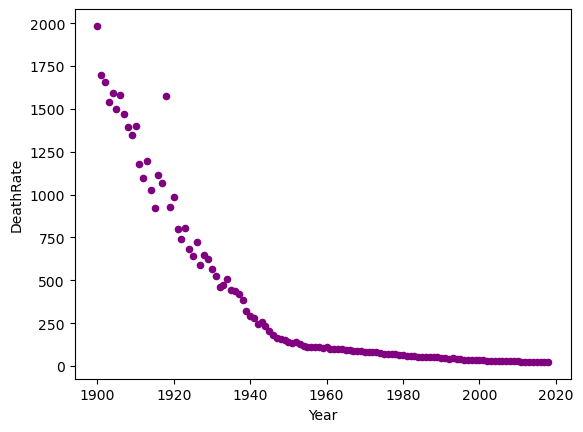

In [56]:
# https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
# 56. using 'mortality_data' DataFrame, query the following AgeGroup: 01-04 Years,
# then, plot the following graph using scatter plot, with a color of your choice

# Note, if receiving a color warning, just hit Shift+Enter in this cell
# Appears to be an Anaconda issue, as plot documentation is above.
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate', c='Purple')